In [3]:
#importamos librerías necesarias
import pandas as pd
import pandas_ml as pdml
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [4]:
#cargamos los juegos de datos OPA2.1 y OPA3.1
RiceOPA2 = pd.read_csv("Rice_OPA2.csv")
RiceOPA3 = pd.read_csv("Rice_OPA3.csv")

In [5]:
#caracterizamos dataframe RiceOPA2
RiceOPA2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Columns: 376 entries, ID to id12010050
dtypes: object(376)
memory usage: 147.0+ KB


In [260]:
#RiceOPA2.count()

In [6]:
#previsualización de dataframe
#RiceOPA2.head(10)
#visualiza el numero de isntancias en cada clase, para luego eliminar n<5
RiceOPA2.groupby('Class').count()

,ID,id1000556,id1001073,id1001821,id1002308,id1002899,id1003559,id1004348,id1004817,id1006175,...,id12006560,id12006742,id12006801,id12007298,id12007742,id12007988,id12008557,id12009128,id12009407,id12010050
Class,,,,,,,,,,,,,,,,,,,,,
Aro,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Aus,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
CHAN,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Ind,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
LI,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Temp,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Trop,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [7]:
#Elimina clases con 1 instancia
RiceOPA2 = RiceOPA2[RiceOPA2.Class != 'CHAN']
RiceOPA2 = RiceOPA2[RiceOPA2.Class != 'LI']
RiceOPA2.groupby('Class').count()

,ID,id1000556,id1001073,id1001821,id1002308,id1002899,id1003559,id1004348,id1004817,id1006175,...,id12006560,id12006742,id12006801,id12007298,id12007742,id12007988,id12008557,id12009128,id12009407,id12010050
Class,,,,,,,,,,,,,,,,,,,,,
Aro,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Aus,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Ind,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Temp,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Trop,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [8]:
#codifica datos categóricos de genotipos (strings) como categorías numéricas
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

RiceOPA2_cod = RiceOPA2.apply(le.fit_transform)
#guarda lista de características del dataframe
features2 = list(RiceOPA2_cod.columns[2:376])
#verifica codificación apropiada de dataframe
RiceOPA2_cod.head(10)


,ID,Class,id1000556,id1001073,id1001821,id1002308,id1002899,id1003559,id1004348,id1004817,...,id12006560,id12006742,id12006801,id12007298,id12007742,id12007988,id12008557,id12009128,id12009407,id12010050
0,17,2,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,21,1,1,1,1,1,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,45,3,0,0,1,0,1,1,0,1,...,1,1,0,1,1,0,0,1,1,0
3,5,3,0,0,1,0,1,1,0,1,...,1,1,0,1,1,0,1,1,1,0
4,40,4,0,0,0,1,1,1,0,1,...,1,1,1,1,1,0,1,1,1,0
5,38,0,0,0,1,0,1,1,0,0,...,1,0,1,1,0,1,1,0,0,0
6,29,4,1,0,1,0,0,0,0,1,...,1,1,1,0,1,0,1,1,1,0
7,7,4,0,0,1,0,0,1,0,0,...,1,1,1,1,1,0,1,1,1,0
8,18,2,1,1,1,0,1,0,1,1,...,0,0,1,1,0,0,0,1,1,0
9,11,1,0,1,1,0,1,1,1,0,...,0,0,0,0,0,1,1,1,1,0


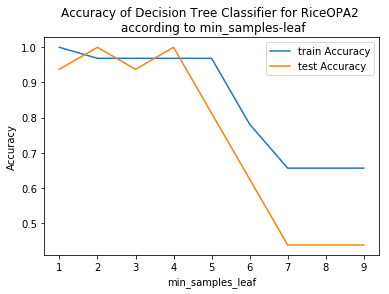

In [44]:
#Clasificación OPA2
#Clasificador DecisionTree, con min_hojas desde 1 hasta 10, test_size de 33%
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus

X_train, X_test, y_train, y_test = train_test_split(RiceOPA2_cod[features2], RiceOPA2_cod['Class'], test_size=0.33)

min_samples_leaf = range(1,10)
train_score = []
test_score = []
for leaves in min_samples_leaf:
    clf_dt = DecisionTreeClassifier(min_samples_leaf=leaves)
    clf_dt.fit(X_train, y_train)
    #guarda cada árbol
    tree.export_graphviz(clf_dt, out_file= str(leaves)+'OPA2tree.dot')
    # almacena train_score 
    train_score.append(clf_dt.score(X_train, y_train))
    # almacena test_score
    test_score.append(clf_dt.score(X_test, y_test))

# crea grafico que relaciona accuracy y min_samples_leaf
plt.plot(min_samples_leaf, train_score, label="train Accuracy")
plt.plot(min_samples_leaf, test_score, label="test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("min_samples_leaf")
plt.title('Accuracy of Decision Tree Classifier for RiceOPA2 \n according to min_samples-leaf')
plt.legend()





0.853571428571 0.0617557730921


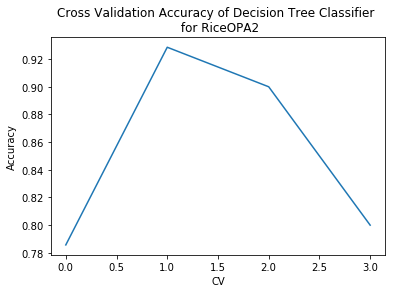

In [51]:
#Validación usando la función cross_val_score para DecisionTree OPA2
from sklearn.model_selection import cross_val_score

clf_dt = DecisionTreeClassifier(min_samples_leaf=4)
scores = cross_val_score(clf_dt,RiceOPA2_cod[features2], RiceOPA2_cod['Class'], cv=4)
#crea gráfico que relaciona el score con el cv
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("CV")
plt.title('Cross Validation Accuracy of Decision Tree Classifier \n for RiceOPA2')

prom= np.mean(scores)
desv= np.std(scores)
print (prom,desv)

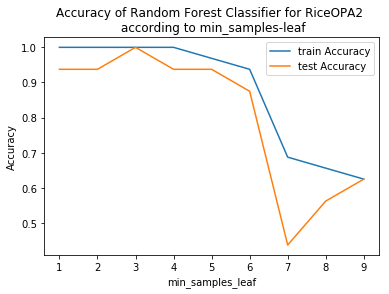

In [38]:
#Clasificación OPA2
#Clasificador RandomForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(RiceOPA2_cod[features2], RiceOPA2_cod['Class'], test_size=0.33)

min_samples_leaf = range(1,10)
train_score = []
test_score = []
for leaves in min_samples_leaf:
    clf_rf = RandomForestClassifier(min_samples_leaf=leaves)
    clf_rf.fit(X_train, y_train)
    # almacena train_score 
    train_score.append(clf_rf.score(X_train, y_train))
    # almacena test_score
    test_score.append(clf_rf.score(X_test, y_test))

# crea grafico que relaciona accuracy y min_samples_leaf
plt.plot(min_samples_leaf, train_score, label="train Accuracy")
plt.plot(min_samples_leaf, test_score, label="test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("min_samples_leaf")
plt.title('Accuracy of Random Forest Classifier for RiceOPA2 \n according to min_samples-leaf')
plt.legend()
  
    

0.896428571429 0.0255051015305


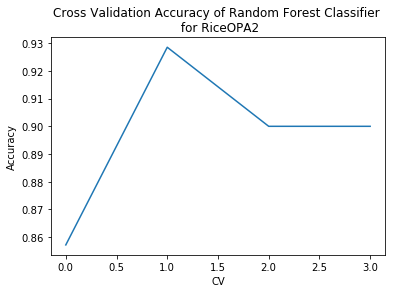

In [42]:
#Validación usando la función cross_val_score para RandomForest OPA2
from sklearn.model_selection import cross_val_score

clf_rf = RandomForestClassifier(min_samples_leaf=3)
scores = cross_val_score(clf_rf,RiceOPA2_cod[features2], RiceOPA2_cod['Class'], cv=4)
#crea gráfico que relaciona el score con el cv
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("CV")
plt.title('Cross Validation Accuracy of Random Forest Classifier \n for RiceOPA2')

prom= np.mean(scores)
desv= np.std(scores)
print (prom,desv)

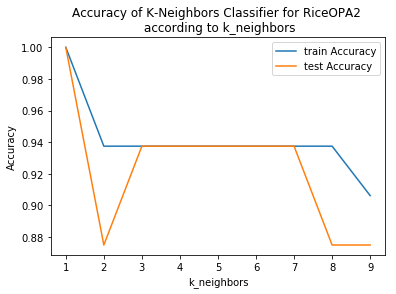

In [30]:
#Clasificación OPA2
#Clasificador K-Neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#se separan datos train y test
X_train, X_test, y_train, y_test = train_test_split(RiceOPA2_cod[features2], RiceOPA2_cod['Class'], test_size=0.33)
train_score = []
test_score = []
#se prueba algoritmo con valores de k desde 1 hasta 10
neighbors_settings = range(1,10)
for n_neighbors in neighbors_settings:
 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
# almacena train_score 
    train_score.append(clf.score(X_train, y_train))
# almacena test_score
    test_score.append(clf.score(X_test, y_test))
# crea grafico que relaciona score y k neighbors
plt.plot(neighbors_settings, train_score, label="train Accuracy")
plt.plot(neighbors_settings, test_score, label="test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("k_neighbors")
plt.title('Accuracy of K-Neighbors Classifier for RiceOPA2 \n according to k_neighbors')
plt.legend()



0.939285714286 0.0369431444028


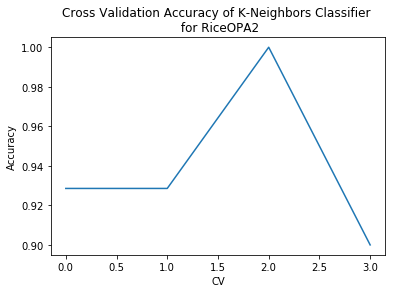

In [34]:
#Validación usando la función cross_val_score para KNeighbors OPA2
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf,RiceOPA2_cod[features2], RiceOPA2_cod['Class'], cv=4)
#crea gráfico que relaciona el score con el cv
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("CV")
plt.title('Cross Validation Accuracy of K-Neighbors Classifier \n for RiceOPA2')

prom= np.mean(scores)
desv= np.std(scores)
print (prom,desv)

In [55]:
#Clasificación OPA2
#Clasificador Naive-Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

#se separan datos train y test
X_train, X_test, y_train, y_test = train_test_split(RiceOPA2_cod[features2], RiceOPA2_cod['Class'], test_size=0.33)

clf_nb = GaussianNB().fit(X_train, y_train)
print(clf_nb.score(X_train, y_train))
print(clf_nb.score(X_test, y_test))


1.0
0.9375


0.975 0.0433012701892


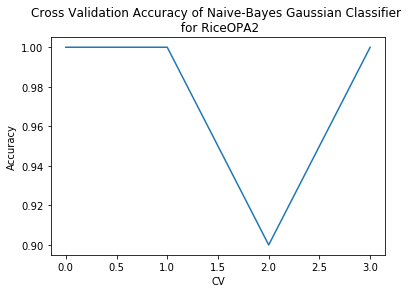

In [62]:
#Validación usando la función cross_val_score para Naive-Bayes
from sklearn.model_selection import cross_val_score

clf_nb = GaussianNB()
scores = cross_val_score(clf_nb,RiceOPA2_cod[features2], RiceOPA2_cod['Class'], cv=4)
#crea gráfico que relaciona el score con el cv
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("CV")
plt.title('Cross Validation Accuracy of Naive-Bayes Gaussian Classifier \n for RiceOPA2')

prom= np.mean(scores)
desv= np.std(scores)
print (prom,desv)

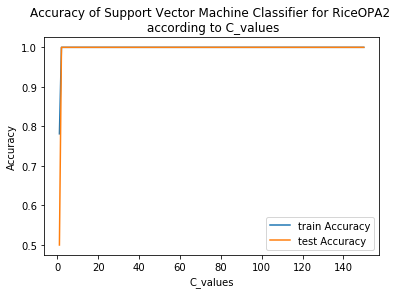

In [70]:
#Clasificación OPA2
#Clasificador Support-Vector-Machine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#se separan datos train y test
X_train, X_test, y_train, y_test = train_test_split(RiceOPA2_cod[features2], RiceOPA2_cod['Class'], test_size=0.33)
train_score = []
test_score = []
#se prueba algoritmo con valores de C definidos en c_values
c_values = [1,2,3,4,5,10,25,50,100,150]
for values in c_values:
    clf_svc = SVC(C=values)
    clf_svc.fit(X_train, y_train)
#almacena train_score 
    train_score.append(clf_svc.score(X_train, y_train))
# almacena test_score
    test_score.append(clf_svc.score(X_test, y_test))
# crea grafico que relaciona score y c-values
plt.plot(c_values, train_score, label="train Accuracy")
plt.plot(c_values, test_score, label="test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C_values")
plt.title('Accuracy of Support Vector Machine Classifier for RiceOPA2 \n according to C_values')
plt.legend()


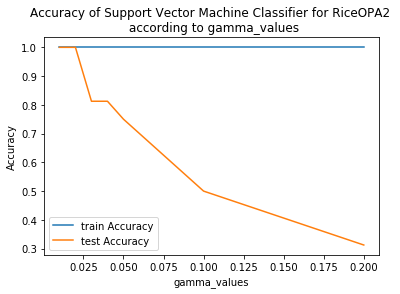

In [79]:
#Clasificación OPA2
#Clasificador Support-Vector-Machine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#se separan datos train y test
X_train, X_test, y_train, y_test = train_test_split(RiceOPA2_cod[features2], RiceOPA2_cod['Class'], test_size=0.33)
train_score = []
test_score = []
#se prueba algoritmo con valores de gamma definidos en ga_values
ga_values = [0.00001, 0.0001,0.001,0.005,0.01,0.02,0.03,0.04,0.05,0.1,0.2]
for values in ga_values:
    clf_svc = SVC(gamma=values)
    clf_svc.fit(X_train, y_train)
#almacena train_score 
    train_score.append(clf_svc.score(X_train, y_train))
# almacena test_score
    test_score.append(clf_svc.score(X_test, y_test))
# crea grafico que relaciona score y gamma-values
plt.plot(ga_values, train_score, label="train Accuracy")
plt.plot(ga_values, test_score, label="test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("gamma_values")
plt.title('Accuracy of Support Vector Machine Classifier for RiceOPA2 \n according to gamma_values')
plt.legend()

1.0 0.0


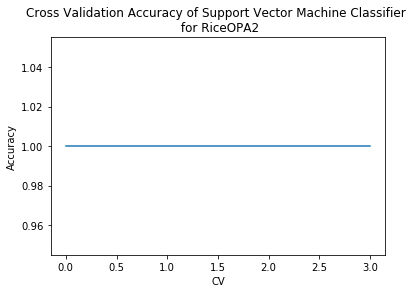

In [80]:
#Validación usando la función cross_val_score para Support-Vector-Machine
from sklearn.model_selection import cross_val_score

clf_svc = SVC(gamma=0.01,C=20)
scores = cross_val_score(clf_svc,RiceOPA2_cod[features2], RiceOPA2_cod['Class'], cv=4)
#crea gráfico que relaciona el score con el cv
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("CV")
plt.title('Cross Validation Accuracy of Support Vector Machine Classifier \n for RiceOPA2')

prom= np.mean(scores)
desv= np.std(scores)
print (prom,desv)

/home/dennisjimenez/miniconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennisjimenez/miniconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennisjimenez/miniconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennisjimenez/miniconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maxi

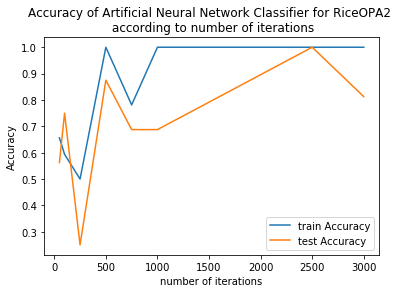

In [86]:
#Clasificación OPA2
#Clasificador Artificial-Neural-Networks
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

#se separan datos train y test
X_train, X_test, y_train, y_test = train_test_split(RiceOPA2_cod[features2], RiceOPA2_cod['Class'], test_size=0.33)
train_score = []
test_score = []
itera = [50,100,250,500,750,1000,2500,3000]
for values in itera:
    clf_mlp = MLPClassifier(hidden_layer_sizes=(5,5,5),max_iter=values)
    clf_mlp.fit(X_train, y_train)
#almacena train_score 
    train_score.append(clf_mlp.score(X_train, y_train))
# almacena test_score
    test_score.append(clf_mlp.score(X_test, y_test))
# crea grafico que relaciona score y # iteraciones
plt.plot(itera, train_score, label="train Accuracy")
plt.plot(itera, test_score, label="test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("number of iterations")
plt.title('Accuracy of Artificial Neural Network Classifier for RiceOPA2 \n according to number of iterations')
plt.legend()




0.821428571429 0.148633228905


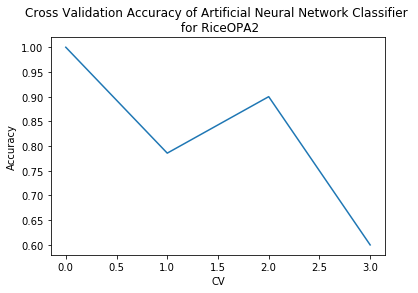

In [88]:
#Validación usando la función cross_val_score para Artificial-Neural-Networks
from sklearn.model_selection import cross_val_score

clf_mlp = MLPClassifier(hidden_layer_sizes=(5,5,5),max_iter=2500)
scores = cross_val_score(clf_mlp,RiceOPA2_cod[features2], RiceOPA2_cod['Class'], cv=4)
#crea gráfico que relaciona el score con el cv
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("CV")
plt.title('Cross Validation Accuracy of Artificial Neural Network Classifier \n for RiceOPA2')

prom= np.mean(scores)
desv= np.std(scores)
print (prom,desv)

In [89]:
##caracterizamos dataframe RiceOPA3
RiceOPA3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Columns: 375 entries, ID to id12010130
dtypes: object(375)
memory usage: 146.6+ KB


In [90]:
#previsualización de dataframe
#RiceOPA3.head(10)
RiceOPA3.groupby('Class').count()

,ID,id1001102,id1001764,id1003056,id1003344,id1004256,wd1000235,id1005511,id1006298,id1007185,...,id12006155,id12006339,id12006721,wd12003998,id12007216,id12008289,id12008779,id12009089,id12009467,id12010130
Class,,,,,,,,,,,,,,,,,,,,,
Aro,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Aus,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
CHAN,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Ind,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
LI,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Temp,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Trop,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [91]:
#Elimina clases con 1 instancia
RiceOPA3 = RiceOPA3[RiceOPA3.Class != 'CHAN']
RiceOPA3 = RiceOPA3[RiceOPA3.Class != 'LI']
RiceOPA3.groupby('Class').count()

,ID,id1001102,id1001764,id1003056,id1003344,id1004256,wd1000235,id1005511,id1006298,id1007185,...,id12006155,id12006339,id12006721,wd12003998,id12007216,id12008289,id12008779,id12009089,id12009467,id12010130
Class,,,,,,,,,,,,,,,,,,,,,
Aro,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Aus,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Ind,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Temp,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Trop,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [92]:
#codificamos datos categóricos de genotipos (strings) como categorías numéricas
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

RiceOPA3_cod = RiceOPA3.apply(le.fit_transform)

features3 = list(RiceOPA3_cod.columns[2:376])

RiceOPA3_cod.head(10)

,ID,Class,id1001102,id1001764,id1003056,id1003344,id1004256,wd1000235,id1005511,id1006298,...,id12006155,id12006339,id12006721,wd12003998,id12007216,id12008289,id12008779,id12009089,id12009467,id12010130
0,17,2,1,0,0,0,1,1,0,1,...,1,1,0,0,0,1,0,0,0,0
1,21,1,2,1,0,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,0
2,45,3,1,1,1,1,0,1,0,1,...,0,0,1,1,1,1,1,1,1,1
3,5,3,1,1,1,1,0,1,0,1,...,0,0,1,1,1,1,1,1,1,1
4,40,4,1,0,0,0,0,1,0,1,...,0,0,1,0,1,1,1,1,1,1
5,38,0,1,1,1,1,0,0,1,1,...,0,1,1,0,1,0,0,0,0,0
6,29,4,1,0,0,0,0,1,0,1,...,0,0,1,0,1,1,1,0,1,1
7,7,4,1,0,0,0,0,1,0,1,...,0,0,1,0,1,1,1,0,1,1
8,18,2,2,1,0,0,1,1,1,0,...,1,1,0,0,0,1,0,0,0,0
9,11,1,2,1,0,0,1,0,1,0,...,1,1,1,0,0,0,0,0,0,0


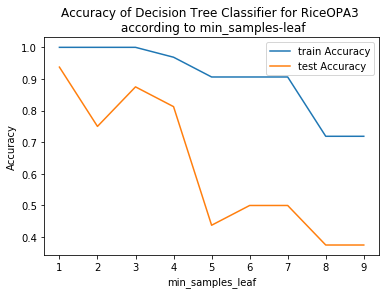

In [93]:
#Clasificación OPA3
#Clasificador DecisionTree, con min_hojas desde 1 hasta 10, test_size de 33%
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus

X_train, X_test, y_train, y_test = train_test_split(RiceOPA3_cod[features3], RiceOPA3_cod['Class'], test_size=0.33)

min_samples_leaf = range(1,10)
train_score = []
test_score = []
for leaves in min_samples_leaf:
    clf_dt = DecisionTreeClassifier(min_samples_leaf=leaves)
    clf_dt.fit(X_train, y_train)
    #guarda cada árbol
    tree.export_graphviz(clf_dt, out_file= str(leaves)+'OPA3tree.dot')
    # almacena train_score 
    train_score.append(clf_dt.score(X_train, y_train))
    # almacena test_score
    test_score.append(clf_dt.score(X_test, y_test))

# crea grafico que relaciona accuracy y min_samples_leaf
plt.plot(min_samples_leaf, train_score, label="train Accuracy")
plt.plot(min_samples_leaf, test_score, label="test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("min_samples_leaf")
plt.title('Accuracy of Decision Tree Classifier for RiceOPA3 \n according to min_samples-leaf')
plt.legend()


0.803571428571 0.0816756901859


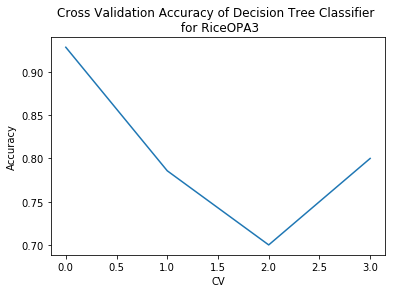

In [94]:
#Validación usando la función cross_val_score para DecisionTree OPA3
from sklearn.model_selection import cross_val_score

clf_dt = DecisionTreeClassifier(min_samples_leaf=4)
scores = cross_val_score(clf_dt,RiceOPA3_cod[features3], RiceOPA3_cod['Class'], cv=4)
#crea gráfico que relaciona el score con el cv
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("CV")
plt.title('Cross Validation Accuracy of Decision Tree Classifier \n for RiceOPA3')

prom= np.mean(scores)
desv= np.std(scores)
print (prom,desv)

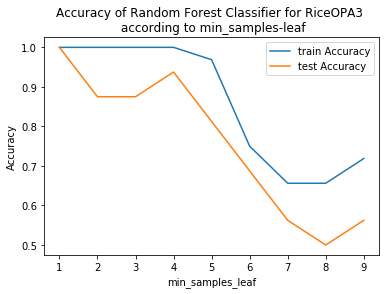

In [95]:
#Clasificación OPA3
#Clasificador RandomForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(RiceOPA3_cod[features3], RiceOPA3_cod['Class'], test_size=0.33)

min_samples_leaf = range(1,10)
train_score = []
test_score = []
for leaves in min_samples_leaf:
    clf_rf = RandomForestClassifier(min_samples_leaf=leaves)
    clf_rf.fit(X_train, y_train)
    # almacena train_score 
    train_score.append(clf_rf.score(X_train, y_train))
    # almacena test_score
    test_score.append(clf_rf.score(X_test, y_test))

# crea grafico que relaciona accuracy y min_samples_leaf
plt.plot(min_samples_leaf, train_score, label="train Accuracy")
plt.plot(min_samples_leaf, test_score, label="test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("min_samples_leaf")
plt.title('Accuracy of Random Forest Classifier for RiceOPA3 \n according to min_samples-leaf')
plt.legend()

0.957142857143 0.0440315285926


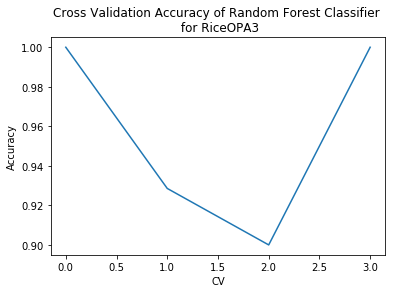

In [96]:
#Validación usando la función cross_val_score para RandomForest OPA3
from sklearn.model_selection import cross_val_score

clf_rf = RandomForestClassifier(min_samples_leaf=4)
scores = cross_val_score(clf_rf,RiceOPA3_cod[features3], RiceOPA3_cod['Class'], cv=4)
#crea gráfico que relaciona el score con el cv
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("CV")
plt.title('Cross Validation Accuracy of Random Forest Classifier \n for RiceOPA3')

prom= np.mean(scores)
desv= np.std(scores)
print (prom,desv)

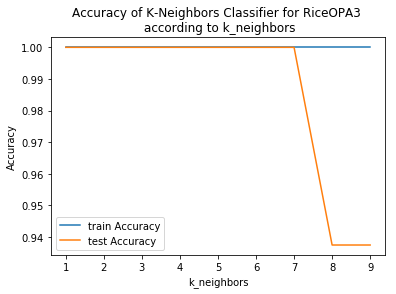

In [102]:
#Clasificación OPA3
#Clasificador K-Neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#se separan datos train y test
X_train, X_test, y_train, y_test = train_test_split(RiceOPA3_cod[features3], RiceOPA3_cod['Class'], test_size=0.33)
train_score = []
test_score = []
#se prueba algoritmo con valores de k desde 1 hasta 10
neighbors_settings = range(1,10)
for n_neighbors in neighbors_settings:
 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
# almacena train_score 
    train_score.append(clf.score(X_train, y_train))
# almacena test_score
    test_score.append(clf.score(X_test, y_test))
# crea grafico que relaciona score y k neighbors
plt.plot(neighbors_settings, train_score, label="train Accuracy")
plt.plot(neighbors_settings, test_score, label="test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("k_neighbors")
plt.title('Accuracy of K-Neighbors Classifier for RiceOPA3 \n according to k_neighbors')
plt.legend()

1.0 0.0


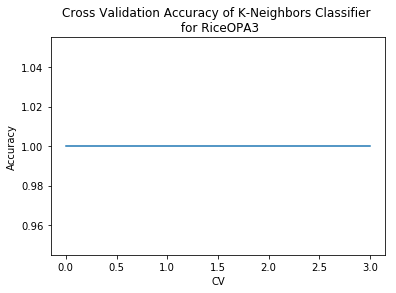

In [103]:
#Validación usando la función cross_val_score para KNeighbors OPA3
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf,RiceOPA3_cod[features3], RiceOPA3_cod['Class'], cv=4)
#crea gráfico que relaciona el score con el cv
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("CV")
plt.title('Cross Validation Accuracy of K-Neighbors Classifier \n for RiceOPA3')

prom= np.mean(scores)
desv= np.std(scores)
print (prom,desv)

In [104]:
#Clasificación OPA3
#Clasificador Naive-Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

#se separan datos train y test
X_train, X_test, y_train, y_test = train_test_split(RiceOPA3_cod[features3], RiceOPA3_cod['Class'], test_size=0.33)

clf_nb = GaussianNB().fit(X_train, y_train)
print(clf_nb.score(X_train, y_train))
print(clf_nb.score(X_test, y_test))


1.0
0.9375


1.0 0.0


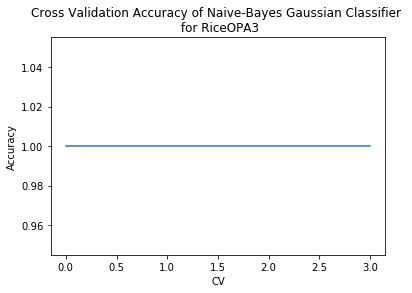

In [105]:
#Validación usando la función cross_val_score para Naive-Bayes
from sklearn.model_selection import cross_val_score

clf_nb = GaussianNB()
scores = cross_val_score(clf_nb,RiceOPA3_cod[features3], RiceOPA3_cod['Class'], cv=4)
#crea gráfico que relaciona el score con el cv
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("CV")
plt.title('Cross Validation Accuracy of Naive-Bayes Gaussian Classifier \n for RiceOPA3')

prom= np.mean(scores)
desv= np.std(scores)
print (prom,desv)

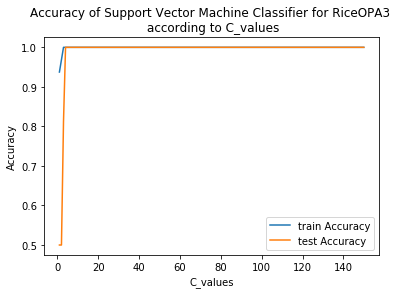

In [107]:
#Clasificación OPA3
#Clasificador Support-Vector-Machine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#se separan datos train y test
X_train, X_test, y_train, y_test = train_test_split(RiceOPA3_cod[features3], RiceOPA3_cod['Class'], test_size=0.33)
train_score = []
test_score = []
#se prueba algoritmo con valores de C definidos en c_values
c_values = [1,2,3,4,5,10,25,50,100,150]
for values in c_values:
    clf_svc = SVC(C=values)
    clf_svc.fit(X_train, y_train)
#almacena train_score 
    train_score.append(clf_svc.score(X_train, y_train))
# almacena test_score
    test_score.append(clf_svc.score(X_test, y_test))
# crea grafico que relaciona score y c-values
plt.plot(c_values, train_score, label="train Accuracy")
plt.plot(c_values, test_score, label="test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C_values")
plt.title('Accuracy of Support Vector Machine Classifier for RiceOPA3 \n according to C_values')
plt.legend()


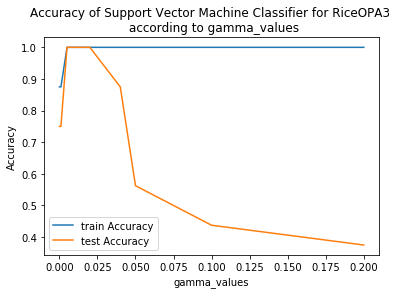

In [108]:
#Clasificación OPA3
#Clasificador Support-Vector-Machine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#se separan datos train y test
X_train, X_test, y_train, y_test = train_test_split(RiceOPA3_cod[features3], RiceOPA3_cod['Class'], test_size=0.33)
train_score = []
test_score = []
#se prueba algoritmo con valores de gamma definidos en ga_values
ga_values = [0.00001, 0.0001,0.001,0.005,0.01,0.02,0.03,0.04,0.05,0.1,0.2]
for values in ga_values:
    clf_svc = SVC(gamma=values)
    clf_svc.fit(X_train, y_train)
#almacena train_score 
    train_score.append(clf_svc.score(X_train, y_train))
# almacena test_score
    test_score.append(clf_svc.score(X_test, y_test))
# crea grafico que relaciona score y gamma-values
plt.plot(ga_values, train_score, label="train Accuracy")
plt.plot(ga_values, test_score, label="test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("gamma_values")
plt.title('Accuracy of Support Vector Machine Classifier for RiceOPA3 \n according to gamma_values')
plt.legend()

1.0 0.0


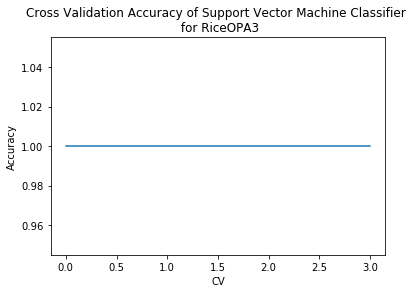

In [109]:
#Validación usando la función cross_val_score para Support-Vector-Machine
from sklearn.model_selection import cross_val_score

clf_svc = SVC(gamma=0.01,C=20)
scores = cross_val_score(clf_svc,RiceOPA3_cod[features3], RiceOPA3_cod['Class'], cv=4)
#crea gráfico que relaciona el score con el cv
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("CV")
plt.title('Cross Validation Accuracy of Support Vector Machine Classifier \n for RiceOPA3')

prom= np.mean(scores)
desv= np.std(scores)
print (prom,desv)

/home/dennisjimenez/miniconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennisjimenez/miniconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennisjimenez/miniconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennisjimenez/miniconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maxi

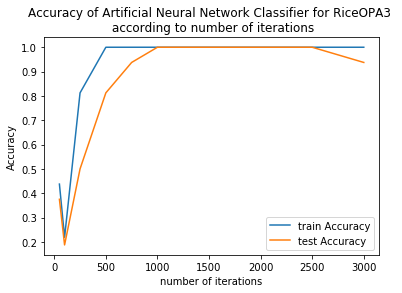

In [110]:
#Clasificación OPA3
#Clasificador Artificial-Neural-Networks
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

#se separan datos train y test
X_train, X_test, y_train, y_test = train_test_split(RiceOPA3_cod[features3], RiceOPA3_cod['Class'], test_size=0.33)
train_score = []
test_score = []
itera = [50,100,250,500,750,1000,2500,3000]
for values in itera:
    clf_mlp = MLPClassifier(hidden_layer_sizes=(5,5,5),max_iter=values)
    clf_mlp.fit(X_train, y_train)
#almacena train_score 
    train_score.append(clf_mlp.score(X_train, y_train))
# almacena test_score
    test_score.append(clf_mlp.score(X_test, y_test))
# crea grafico que relaciona score y # iteraciones
plt.plot(itera, train_score, label="train Accuracy")
plt.plot(itera, test_score, label="test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("number of iterations")
plt.title('Accuracy of Artificial Neural Network Classifier for RiceOPA3 \n according to number of iterations')
plt.legend()


0.957142857143 0.0440315285926


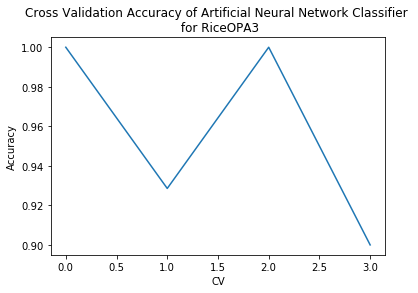

In [111]:
#Validación usando la función cross_val_score para Artificial-Neural-Networks
from sklearn.model_selection import cross_val_score

clf_mlp = MLPClassifier(hidden_layer_sizes=(5,5,5),max_iter=2000)
scores = cross_val_score(clf_mlp,RiceOPA3_cod[features3], RiceOPA3_cod['Class'], cv=4)
#crea gráfico que relaciona el score con el cv
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("CV")
plt.title('Cross Validation Accuracy of Artificial Neural Network Classifier \n for RiceOPA3')

prom= np.mean(scores)
desv= np.std(scores)
print (prom,desv)